In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import random

In [129]:
dataset_dir="E:\humans" # Seting directory to datasets
categories=["Human","Not Human"]  # Creating two categories that clasify weither an image is human or not

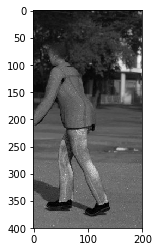

In [132]:
# import single image to look its config. 
# First Check single image
for category in categories:
    path = os.path.join(dataset_dir, category) # creating path to humans and not humans directory
    for img in os.listdir(path):  # enter in the particular dir where all images are places
        img_first = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # loading first image only in grayscale
        plt.imshow(img_first,cmap="gray") 
        plt.show()  #showing first image
        break
    break
        

In [133]:
img_first.shape

(400, 200)

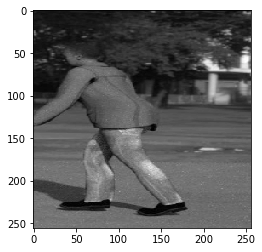

In [134]:
img_size = 256  #changing the size of image to 256 X 256
new_image =  cv2.resize(img_first,(img_size, img_size))
plt.imshow(new_image,cmap="gray") # showing the image after resizing it
plt.show() 

In [130]:
# Now lets begin with creating the training dataset of all images
train_data = []
img_size = 50  #changing the size of image 


def full_training_set():   # defining the function of loading training data
    for category in categories:
        path = os.path.join(dataset_dir, category) # creating path to humans and not humans directory
        category_index = categories.index(category)#seting index  to each category for eg. For humans to 0 & not humans to 1
        for img in os.listdir(path):  # enter in the particular dir where all images are places
            img_first = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # loading first image only in grayscale
            new_image =  cv2.resize(img_first,(img_size, img_size)) #performing resizing operation to every image
            train_data.append([ new_image , category_index])
            
full_training_set()            

In [102]:
print(len(train_data))# total images to train

4331


In [103]:
random.shuffle(train_data) #shuffle all images or mix 

In [104]:
x_value=[]  # for features
y_value=[]  # for classify weither the image is human or not we use 0 for human and 1 for not human

In [105]:
for features, labels in train_data:
    x_value.append(features)  # storing features values in this varable
    y_value.append(labels)    # storing target value in this varable

x_value = np.array(x_value).reshape(-1,img_size,img_size,1)  # converting to numpy array to pass to model

In [ ]:
#first scale the data, we know every image is of 256 X 256 of range 0-255 so to scale the data just divide by 255 max value
 #reshape
x_value = x_value/255.0

In [108]:
x_value[0]

array([[[ 1.        ],
        [ 1.        ],
        [ 1.        ],
        ..., 
        [ 1.        ],
        [ 1.        ],
        [ 1.        ]],

       [[ 1.        ],
        [ 1.        ],
        [ 1.        ],
        ..., 
        [ 1.        ],
        [ 1.        ],
        [ 1.        ]],

       [[ 1.        ],
        [ 1.        ],
        [ 1.        ],
        ..., 
        [ 1.        ],
        [ 1.        ],
        [ 1.        ]],

       ..., 
       [[ 0.25882353],
        [ 0.2627451 ],
        [ 0.28627451],
        ..., 
        [ 0.22745098],
        [ 0.23921569],
        [ 0.2       ]],

       [[ 0.2627451 ],
        [ 0.23529412],
        [ 0.20784314],
        ..., 
        [ 0.28627451],
        [ 0.27843137],
        [ 0.27843137]],

       [[ 0.13333333],
        [ 0.1254902 ],
        [ 0.12941176],
        ..., 
        [ 0.26666667],
        [ 0.27058824],
        [ 0.27058824]]])

In [109]:
x_value.shape[1:]

(50, 50, 1)

In [194]:
#y_value = tf.keras.utils.to_categorical(y_value, num_classes = 2)

In [110]:
# Model Define
model = Sequential()

model.add(Conv2D(64,  (3,3) , input_shape= x_value.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#model.add(Conv2D(128, (3,3)))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Dropout(0.25))
model.add(Flatten()) # it uses bec need to be 1D for Dense layer which is our next layer
model.add(Dense(64)) 

model.add(Dense(1))
model.add(Activation("sigmoid"))

          
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

model.fit(x_value, y_value, epochs=10, validation_split=0.1)


Train on 3897 samples, validate on 434 samples
Epoch 1/10
3897/3897 [==============================] - 20s 5ms/step - loss: 0.3539 - acc: 0.8542 - val_loss: 0.2722 - val_acc: 0.8871
Epoch 2/10
3897/3897 [==============================] - 19s 5ms/step - loss: 0.1971 - acc: 0.9122 - val_loss: 0.2128 - val_acc: 0.9055
Epoch 3/10
3897/3897 [==============================] - 19s 5ms/step - loss: 0.1428 - acc: 0.9369 - val_loss: 0.2348 - val_acc: 0.8917
Epoch 4/10
3897/3897 [==============================] - 19s 5ms/step - loss: 0.0957 - acc: 0.9602 - val_loss: 0.2008 - val_acc: 0.9101
Epoch 5/10
3897/3897 [==============================] - 18s 5ms/step - loss: 0.0701 - acc: 0.9764 - val_loss: 0.2263 - val_acc: 0.8963
Epoch 6/10
3897/3897 [==============================] - 18s 5ms/step - loss: 0.0458 - acc: 0.9846 - val_loss: 0.2871 - val_acc: 0.8940
Epoch 7/10
3897/3897 [==============================] - 19s 5ms/step - loss: 0.0348 - acc: 0.9861 - val_loss: 0.2883 - val_acc: 0.9009
Epoch 8/

In [111]:
val_los, val_acc = model.evaluate(x_value, y_value)
print(val_los, val_acc) # loss = .04 &  Accuracy = .98


4331/4331 [==============================] - 5s 1ms/step
0.0467925231338 0.989609789887


In [112]:
#Saving the model
model.save("E:\saving dir\human_recognize.model")

#loading the model to predict
model_load = tf.keras.models.load_model("E:\saving dir\human_recognize.model")

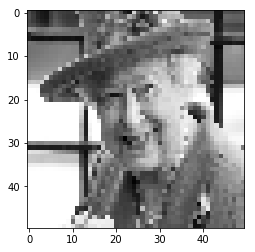

Human [[  6.68801223e-14]]


In [113]:
# first Test Image
test_imge=cv2.imread("E:\saving dir\old lady.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1,img_size , img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

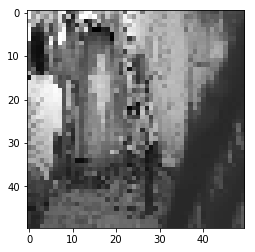

Not Human [[ 1.]]


In [114]:
# Second Test Image
test_imge=cv2.imread("E:\saving dir\kidplaying.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size, img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

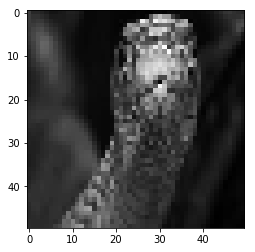

Not Human [[ 1.]]


In [115]:
# Third Test Image
test_imge=cv2.imread("E:\saving dir\snake.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size, img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

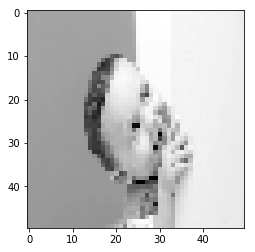

Human [[ 0.99863309]]


In [116]:
# forth Test Image
test_imge=cv2.imread("E:\saving dir\smallkid.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size, img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

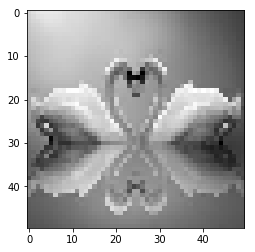

Not Human [[ 1.]]


In [117]:
# fifth Test Image
test_imge=cv2.imread("E:\saving dir\duck.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size, img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

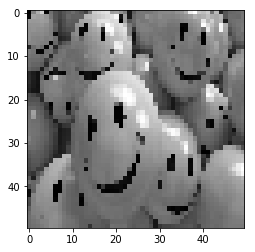

Not Human [[ 1.]]


In [118]:
# Sixth Test Image
test_imge=cv2.imread("E:\saving dir\smiling balls.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size, img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

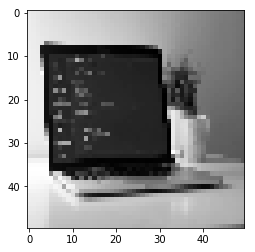

Not Human [[ 1.]]


In [119]:
# Seventh Test Image
test_imge=cv2.imread("E:\saving dir\lapy.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size,img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

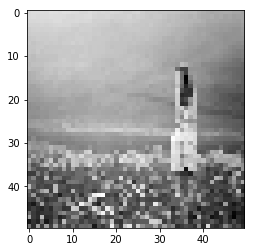

Not Human [[ 1.]]


In [120]:
# Eighth Test Image
test_imge=cv2.imread("E:\saving dir\girl.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size, img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

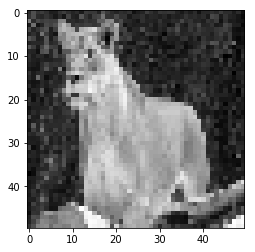

Not Human [[ 1.]]


In [121]:
# Nineth Test Image
test_imge=cv2.imread("E:\saving dir\loin.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size, img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

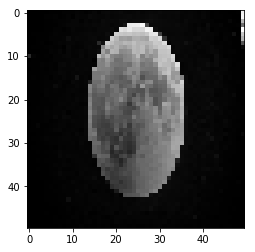

Not Human [[ 1.]]


In [122]:
# Tenth Test Image
test_imge=cv2.imread("E:\saving dir\moon.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size, img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

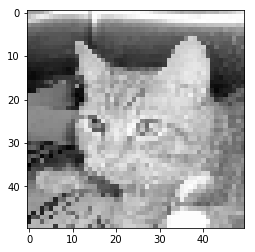

Not Human [[ 1.]]


In [123]:
# Eleventh Test Image
test_imge=cv2.imread("E:\saving dir\cat.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size, img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

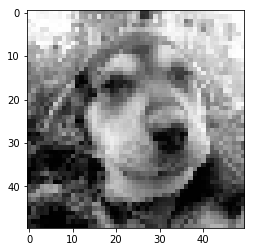

Human [[ 0.99991107]]


In [124]:
# Twelfth Test Image
test_imge=cv2.imread("E:\saving dir\dog.jpg",cv2.IMREAD_GRAYSCALE)
test_imge =  cv2.resize(test_imge,(img_size, img_size))
plt.imshow(test_imge, cmap="gray")
plt.show()
reshp = np.array(test_imge).reshape(-1, img_size, img_size, 1) #reshape
reshp = reshp / 50.0
# make prediction of test data
predictions = model_load.predict([reshp])
if(predictions < 1):
    print("Human",predictions)
else:
    print("Not Human",predictions)

In [63]:
#saving the data set to csv format
df_data = pd.DataFrame(train_data)  #converting the dataset to DATA FRAME
df_data.columns = ['Images','Category 0 for human & 1 for other']  #change column name 
df_data.to_csv("E:\saving dir\Human_classification.csv",index = False)